# Project: Investigating the Movies  Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we are going to analyze the movie dataset. The dataset has many columns as follow: id and imdb_id, the movie unique identifier; popularity, budget, revenue, original_title, cast homepage, director, tagline keywords, overview, runtime, genres, production_companies, release_year, vote_average, vote_count, release_date, and budget_adj and revenue_adj which are respectly the adjusted budget and revenue.

We will start by exploring and cleaning the dataset, then we will draw insights from it. To drow insights from the dataset, we will answer these questions:
What is the number of movies per year?

How the runtime of movies has changed over the years?

How the budget of movies has changed over the years?

Is the runtime related to the budget?

Is the revenue related to the runtime?

What are the longuest and shortest movies?

Which movie has the higest revenue?

What is the most popular movie and what is its revenue?

Get informations about the Top 10 Highest Voted Movies

Display statistics about the top 10 most popular movies

Display Top 10 Highest Revenue Movie Titles

Find Average Vote of Movies Year Wise

Classify Movies Based on vote_average [Excellent, Good, and Average]

What is the mean revenue?

What is the average revenue per year?

What is the average budget per year?

What is the mean popularity?

Does popularity affect the revenue?

Does voting affect the revenue?

After anwsering all the questions, we will then give conclusions about the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Loading the dataset

In [2]:
df = pd.read_csv('../tmdb-movies.csv')

Getting informations about the dataset

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Percentage of null values per column

In [8]:
df.isnull().sum()*100/df.shape[0]

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

### Cleaning the dataset

The dataset has 10866 rows and 21 columns. After exploring it, we came out with the decision to clean it due to the presence of unnecessary columns, duplicated rows, missing values, and zeros values.

Removing unnecessary columns

In [9]:
df.drop(['id', 'imdb_id', 'homepage', 'revenue', 'budget'], axis=1, inplace=True)

Removing rows with missing values

In [10]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

popularity              0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Removing duplicates

In [11]:
df.drop_duplicates(inplace=True)
df.popularity = df.popularity.apply(lambda x: round(x, 1))

Checking 0 values    

In [12]:
print(df[df['popularity'] == 0].value_counts().sum())
print(df[df['vote_count'] == 0].value_counts().sum())
print(df[df['vote_average'] == 0].value_counts().sum())
print(df[df['runtime'] == 0].value_counts().sum())
print(df[df['budget_adj'] == 0].value_counts().sum())
print(df[df['revenue_adj'] == 0].value_counts().sum())

110
0
0
3
2766
2855


We can see that some columns have a big amount of 0 values. But replacing some of them may impact the dataset negatively, so we will replace only those in the runtime column.

Replacing 0 values

In [13]:
df[df['runtime'] == 0].value_counts().sum()
df['runtime'].replace(0, df.runtime.mean(), inplace=True)


Saving a copy of the cleaned dataset

In [14]:
df.to_csv('./tmdb_cleaned.csv')

<a id='eda'></a>
## Exploratory Data Analysis

### What is the number of movies per year?

<AxesSubplot:ylabel='number of movies'>

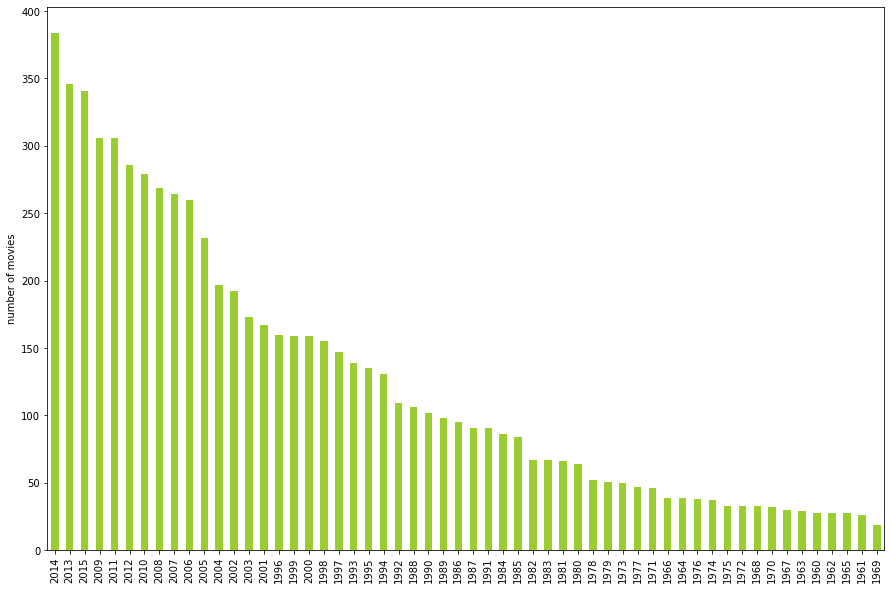

In [15]:
df.release_year.value_counts().plot(kind='bar', figsize=(
    15, 10), ylabel='number of movies', color='yellowgreen')


We can notice an encrease of movies production with time.

### How the runtime of movies has changed over the years?

<AxesSubplot:xlabel='release_year', ylabel='average_runtime'>

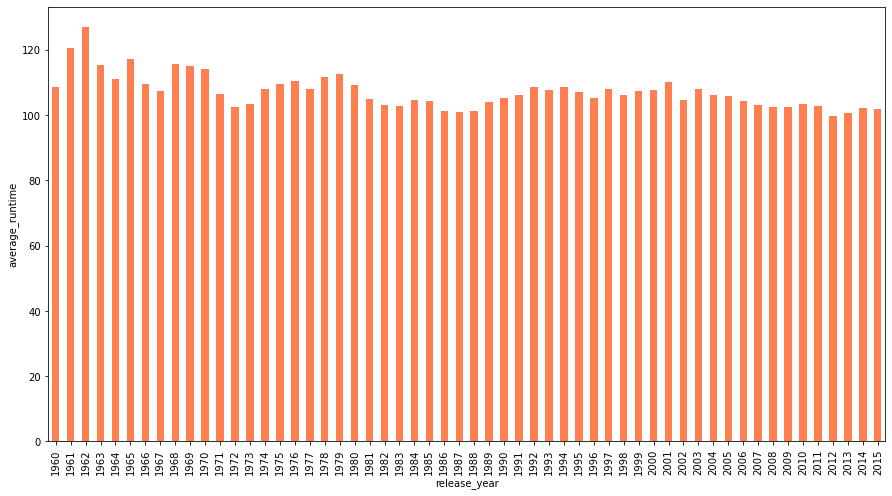

In [16]:
df.groupby('release_year')['runtime'].mean().plot(
    kind='bar', figsize=(15, 8), ylabel='average_runtime', color='coral')


We see that the average runtime of movies per year vary between 95 minutes and 120 minutes

### How the budget of movies has changed over the years?

<AxesSubplot:xlabel='release_year', ylabel='budget'>

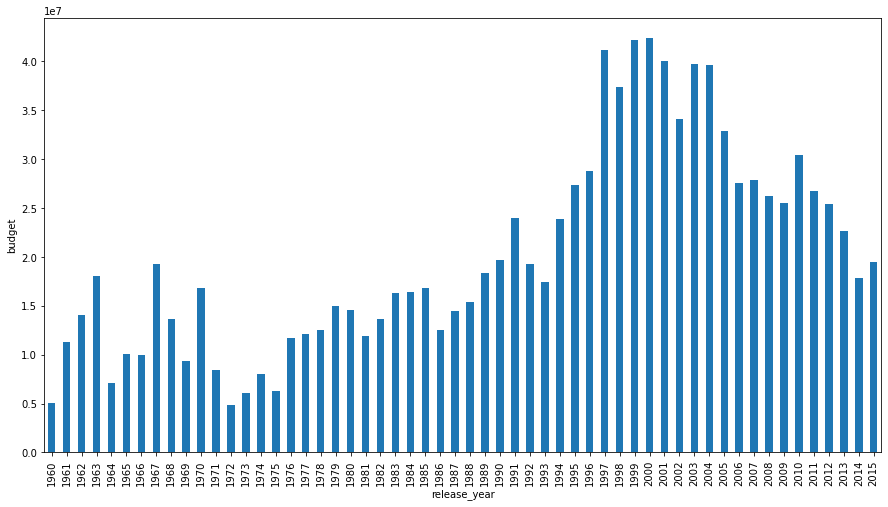

In [17]:
df.groupby('release_year')['budget_adj'].mean().plot(
    kind='bar', figsize=(15, 8), ylabel='budget')

We have a serious encrease of budget between 1994 and 2010

### Is the runtime related to the budget?

<AxesSubplot:xlabel='runtime', ylabel='budget_adj'>

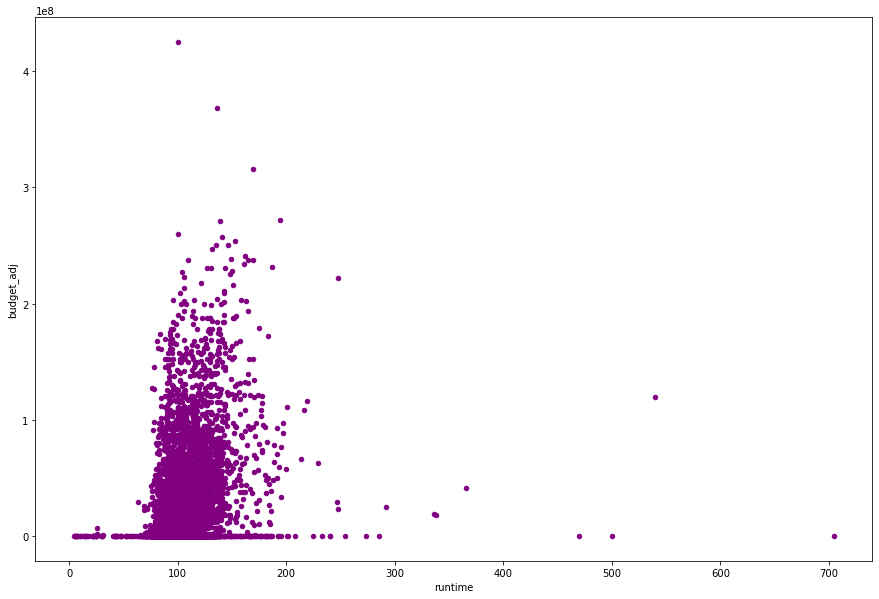

In [18]:
df.plot(kind='scatter', figsize=(15, 10), y='budget_adj', x='runtime', color='purple')

Here we can see that most of movies with higer budget have a runtime between 80 and 250 minutes

### Is the revenue related to the runtime?

<AxesSubplot:xlabel='runtime', ylabel='revenue_adj'>

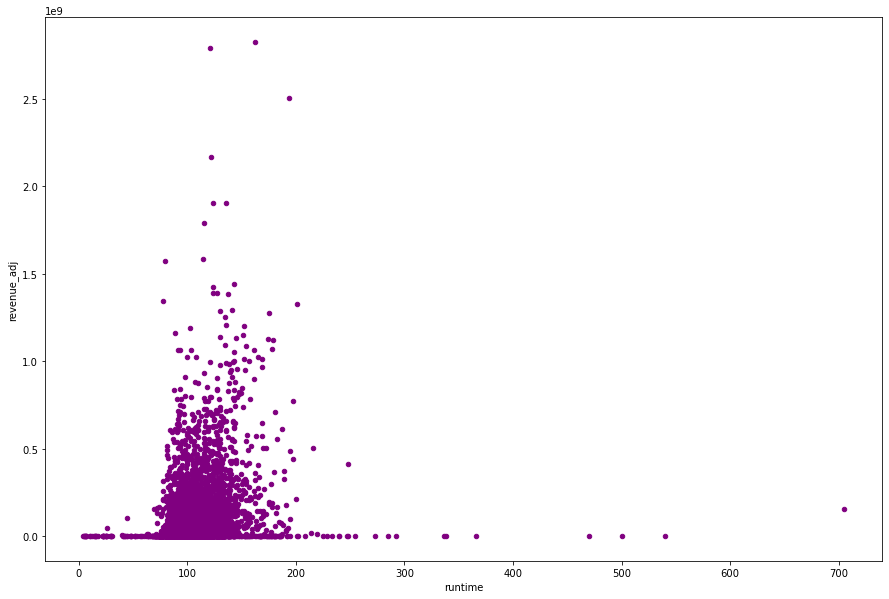

In [19]:
df.plot(kind='scatter', figsize=(15, 10),
        y='revenue_adj', x='runtime', color='purple')


Same as the case of budget, movies with higer revenue have a runtime between 80 and 250 minutes

### What are the longuest and shortest movies?

Shortest movies

In [20]:
print(df[df.runtime == df.runtime.min()]['original_title'])

5311    Geri's Game
Name: original_title, dtype: object


We have many movies with the same minimum runtime.

Longuest movies

In [21]:
print(df[df.runtime == df.runtime.max()]['original_title'])

2722    Band of Brothers
Name: original_title, dtype: object


The longuest movie is "Band of Brothers"

### Which movie has the higest revenue?

In [22]:
print(df[df.revenue_adj == df.revenue_adj.max()]['original_title'])
print(df[df.revenue_adj == df.revenue_adj.max()]['revenue_adj'])

1386    Avatar
Name: original_title, dtype: object
1386    2.827124e+09
Name: revenue_adj, dtype: float64


Avatar is the movie with the higest revenue which is 282 712 400

### What is the most popular movie and what is its revenue?

In [23]:
df[df.popularity == df.popularity.max()]['original_title']

0    Jurassic World
Name: original_title, dtype: object

In [24]:
df[df.popularity == df.popularity.max()]['revenue_adj']

0    1.392446e+09
Name: revenue_adj, dtype: float64

The most popular movie is Jurassic World with revenue of 139 244 600

### Get informations about the Top 10 Highest Voted Movies

Top 10 Highest voted Movie Titles 

In [25]:
df_va = df.sort_values(by='vote_average', ascending=False).iloc[:10]
df_va['original_title']

609     The Jinx: The Life and Deaths of Robert Durst
7948                                Stop Making Sense
4178                         The Shawshank Redemption
7269                                    The Godfather
9315                                  For All Mankind
650                                          Whiplash
4179                                     Forrest Gump
9758                           The Godfather: Part II
4177                                     Pulp Fiction
2389                         Bill Cunningham New York
Name: original_title, dtype: object

Display Top 10 Highest voted Movie Directors

In [26]:
df_va['director'].apply(lambda x: ", ".join(x.split('|')))

609           Andrew Jarecki
7948          Jonathan Demme
4178          Frank Darabont
7269    Francis Ford Coppola
9315              Al Reinert
650          Damien Chazelle
4179         Robert Zemeckis
9758    Francis Ford Coppola
4177       Quentin Tarantino
2389           Richard Press
Name: director, dtype: object

Display Top 10 Highest voted Movie Productions companies

In [27]:
df_va['production_companies'].apply(lambda x: ", ".join(x.split('|')))

609     Blumhouse Productions, Hit the Ground Running ...
7948                Talking Heads, Arnold Stiefel Company
4178                            Castle Rock Entertainment
7269               Paramount Pictures, Alfran Productions
9315                   Apollo Associates, FAM Productions
650     Bold Films, Blumhouse Productions, Right of Wa...
4179                                   Paramount Pictures
9758              Paramount Pictures, The Coppola Company
4177            Miramax Films, A Band Apart, Jersey Films
2389                                  First Thought Films
Name: production_companies, dtype: object

Display Top 10 Highest voted Movie Cast

In [28]:
df_va['cast'].apply(lambda x: ", ".join(x.split('|')))

609     Robert Durst, Andrew Jarecki, Marc Smerling, Z...
7948    David Byrne, Tina Weymouth, Chris Frantz, Jerr...
4178    Tim Robbins, Morgan Freeman, Bob Gunton, Willi...
7269    Marlon Brando, Al Pacino, James Caan, Richard ...
9315    Jim Lovell, Russell Schweickart, Eugene Cernan...
650     Miles Teller, J.K. Simmons, Melissa Benoist, A...
4179    Tom Hanks, Robin Wright, Gary Sinise, Mykelti ...
9758    Al Pacino, Robert Duvall, Diane Keaton, Robert...
4177    John Travolta, Samuel L. Jackson, Uma Thurman,...
2389    Bill Cunningham, Tom Wolfe, Anna Wintour, Carm...
Name: cast, dtype: object

Display Top 10 Highest voted Movie Genres

In [29]:
df_va['genres'].apply(lambda x: ", ".join(x.split('|')))


609                Documentary
7948        Documentary, Music
4178              Drama, Crime
7269              Drama, Crime
9315               Documentary
650               Drama, Music
4179    Comedy, Drama, Romance
9758              Drama, Crime
4177           Thriller, Crime
2389               Documentary
Name: genres, dtype: object

Display Top 10 Highest voted Movie runtime

In [30]:
df_va['runtime']

609     240.0
7948     88.0
4178    142.0
7269    175.0
9315     80.0
650     105.0
4179    142.0
9758    200.0
4177    154.0
2389     84.0
Name: runtime, dtype: float64

Display Top 10 Highest voted Movie overview

In [31]:
df_va['overview']

609     Robert Durst, scion of one of New Yorkâ€™s bil...
7948    David Byrne walks onto the stage and does a so...
4178    Framed in the 1940s for the double murder of h...
7269    Spanning the years 1945 to 1955, a chronicle o...
9315    In July 1969, the space race ended when Apollo...
650     Under the direction of a ruthless instructor, ...
4179    A man with a low IQ has accomplished great thi...
9758    In the continuing saga of the Corleone crime f...
4177    A burger-loving hit man, his philosophical par...
2389    Chronicles a man who is obsessively interested...
Name: overview, dtype: object

Display Top 10 Highest voted Movie tagline

In [32]:
df_va['tagline']

609     Four Decades. Three Murders. And One Very Rich...
7948    Why stop making sense? Why a movie? Why a big ...
4178    Fear can hold you prisoner. Hope can set you f...
7269                           An offer you can't refuse.
9315                                 A Film by Al Reinert
650       The road to greatness can take you to the edge.
4179    The world will never be the same, once you've ...
9758    I don't feel I have to wipe everybody out, Tom...
4177    Just because you are a character doesn't mean ...
2389                   He who seeks beauty, will find it.
Name: tagline, dtype: object

Display Top 10 Highest voted Movie keywords

In [33]:
df_va['keywords'].apply(lambda x: ", ".join(x.split('|')))

609                              murder, crime, real life
7948                                              concert
4178    prison, corruption, police brutality, prison c...
7269    italy, love at first sight, loss of father, pa...
9315                      space travel, history, apollo s
650     jazz, obsession, conservatory, music teacher, ...
4179    vietnam veteran, hippie, mentally disabled, ru...
9758    italo-american, cuba, vororte, melancholy, praise
4177    transporter, brothel, drug dealer, boxer, massage
2389    fashion, milliner, new york city ballet, ponch...
Name: keywords, dtype: object

### Display statistics about the top 10 most popular movies

In [34]:
df_po = df.sort_values(by='popularity', ascending=False).iloc[:10]
df_po.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10.00000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01
mean,17.20000,127.000000,4620.700000,7.240000,2010.700000,1.199485e+08,9.413288e+08
std,8.27419,17.676098,1422.553576,0.629285,11.851395,5.334061e+07,8.452280e+08
min,10.70000,101.000000,2480.000000,6.300000,1977.000000,1.842182e+07,7.252661e+07
25%,11.55000,120.250000,3654.500000,6.700000,2014.000000,1.046841e+08,4.042936e+08
50%,13.05000,122.000000,4860.000000,7.300000,2014.000000,1.379999e+08,6.755589e+08
75%,22.25000,133.000000,5599.500000,7.825000,2015.000000,1.554341e+08,1.222407e+09
max,33.00000,169.000000,6498.000000,8.000000,2015.000000,1.839999e+08,2.789712e+09


### Display Top 10 Highest Revenue Movie Titles

In [35]:
df_re = df.sort_values(by='revenue_adj', ascending=False).iloc[:10]
df_re['original_title']

1386                             Avatar
1329                          Star Wars
5231                            Titanic
10594                      The Exorcist
9806                               Jaws
3          Star Wars: The Force Awakens
8889         E.T. the Extra-Terrestrial
8094                            The Net
10110    One Hundred and One Dalmatians
4361                       The Avengers
Name: original_title, dtype: object

### Find Average Vote of Movies Year Wise

In [36]:
df_va.groupby('release_year')['vote_average'].mean()

release_year
1972    8.3
1974    8.1
1984    8.4
1989    8.2
1994    8.2
2010    8.1
2014    8.2
2015    8.4
Name: vote_average, dtype: float64

### Classify Movies Based on vote_average [Excellent, Good, and Average]

In [37]:
mean_vote_average = df.vote_average.mean()


def classify_movies(vote_average):
    if vote_average > mean_vote_average:
        return 'Excellent'
    elif vote_average == mean_vote_average:
        return 'Good'
    else:
        return 'Average'


df['movie_class'] = df.vote_average.apply(lambda x: classify_movies(x))
df.head()


,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_class
0,33.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Excellent
1,28.4,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Excellent
2,13.1,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Excellent
3,11.2,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Excellent
4,9.3,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Excellent


### What is the mean revenue?

In [38]:
df.revenue_adj.mean()

76441448.78317109

### What is the average revenue per year?

<AxesSubplot:xlabel='release_year', ylabel='average_revenue'>

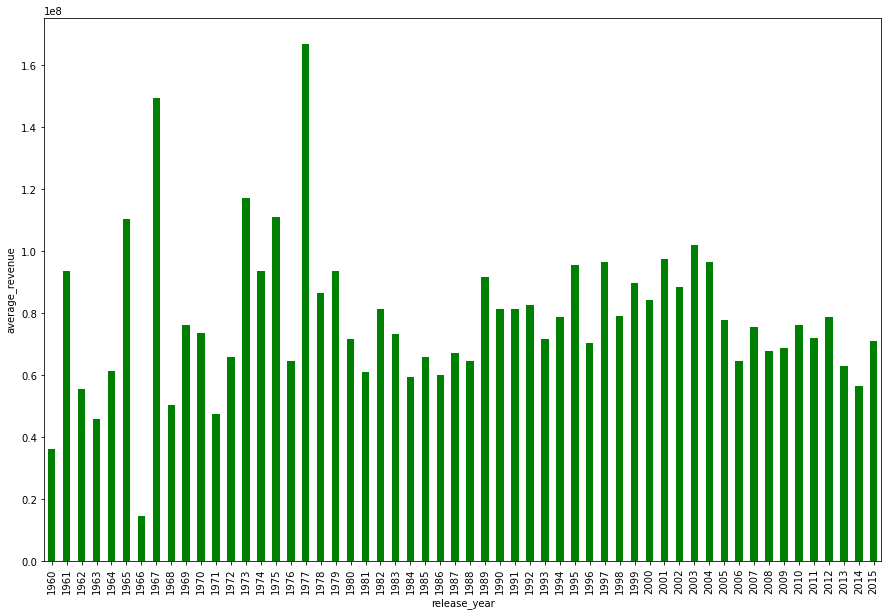

In [39]:
df.groupby('release_year')['revenue_adj'].mean().plot(kind='bar', ylabel='average_revenue', figsize=(15, 10), color='green')

### What is the average budget per year?

<AxesSubplot:xlabel='release_year', ylabel='average_budget'>

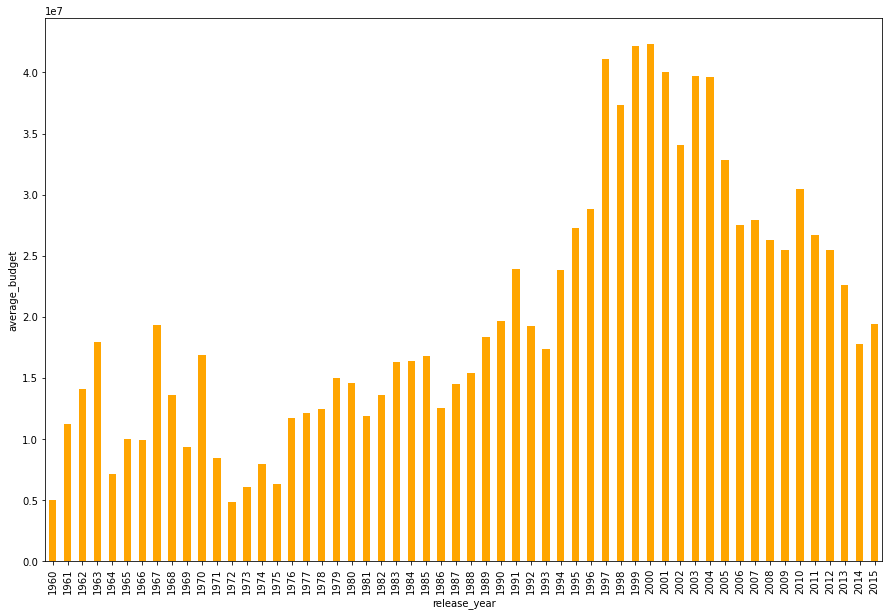

In [40]:
df.groupby('release_year')['budget_adj'].mean().plot(kind='bar', ylabel='average_budget', figsize=(15, 10), color='orange')

### What is the mean popularity?

In [41]:
df.popularity.mean()

0.8289574740435246

### Does popularity affect the revenue?

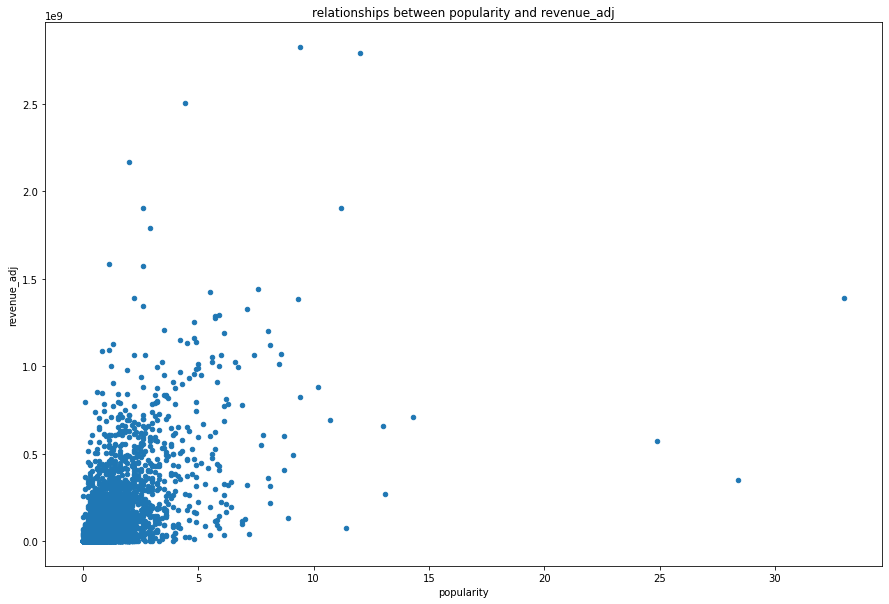

In [42]:
df.plot(kind='scatter', x='popularity', y='revenue_adj', figsize=(15, 10), title='relationships between popularity and revenue_adj');

We can see that some movies with higer revenue have a popularity which is lower than the mean value, and some have a popularity which is higer than the mean value, which show that popularity have a lesser impact on the revenue.

### Does voting affect the revenue?

In [43]:
df.vote_average.mean()

6.013383586971961

In [44]:
df.vote_average.min()

1.5

In [45]:
df.vote_average.max()

8.4

<AxesSubplot:title={'center':'relationships between vote_average and revenue_adj'}, xlabel='vote_average', ylabel='revenue_adj'>

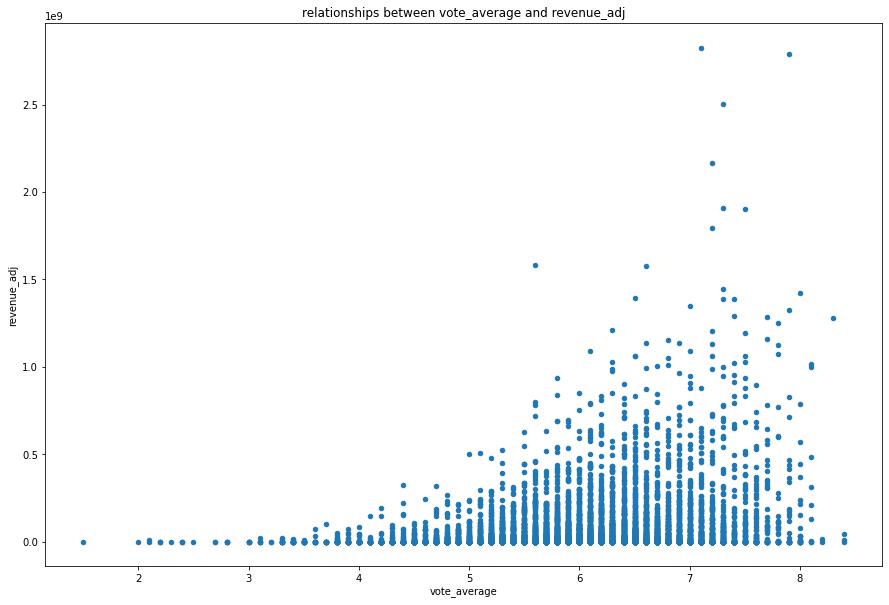

In [46]:
df.plot(kind='scatter', figsize=(15, 10), x='vote_average', y='revenue_adj', title='relationships between vote_average and revenue_adj')

Here we can notice that for the same vote_average values, some movies have higer revenue than the others.


### Does the buget affect the revenue?

<AxesSubplot:xlabel='budget_adj', ylabel='revenue_adj'>

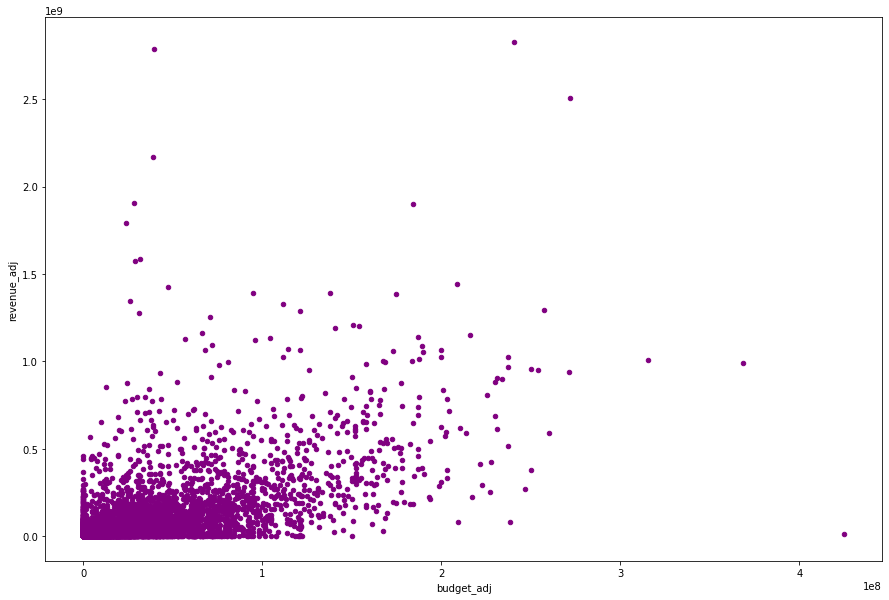

In [47]:
df.plot(kind='scatter', figsize=(15, 10), color='purple', x='budget_adj', y='revenue_adj')

We can notice that for most of the movies, high budget lead to high revenue.

<a id='conclusions'></a>
## Conclusions

We have reach the end of our analysis. After answering all the questions, we have realized that the production of movies has increased over years and the average runtime has remained in the range of 90 minutes to 120 minites for most of the movies;the budget of movies has seriously increased between 1994 and 2012. We were supprisd to see that, the movie with higest revenue is not the most popular and the most popular movie is not the most voted, the same goes for the most voted. We also realized that popularity and runtime do not have meaningfull impact on the revenue of movies, but higer revenue movies have higer voting average and higher buget movies tend to have have higer revenue.